# 402 高维到低维映射以及真实数据实现
$$X_k=X\cdot W_k^T$$

### 从高维数据向低维数据的映射

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [3]:
import sys
sys.path.insert(0, './code')
from playML.PCA import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [4]:
pca.components_                   # 效果不是很理想 原因是增加的噪声的方差较大。

array([[ 0.77941612,  0.6265066 ],
       [-0.62650023,  0.77942124]])

In [5]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [6]:
X_reduction = pca.transform(X)
print(X_reduction.shape)

(100, 1)


In [7]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

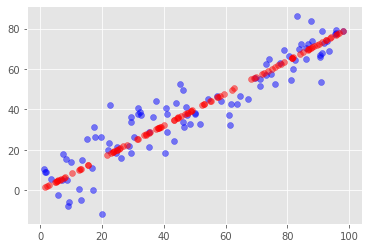

In [8]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)

### scikit-learn中的PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.components_

array([[0.77941607, 0.62650666]])

In [11]:
X_reduction = pca.transform(X)
X_restore = pca.inverse_transform(X_reduction)

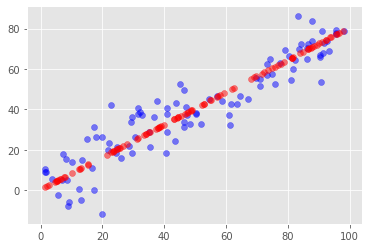

In [12]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1], color='r', alpha=0.5)

## 使用真实数据集scikit-learn

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import datasets

In [14]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [16]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

Wall time: 14 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn_clf.score(X_test, y_test)

0.9866666666666667

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [19]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
knn_clf.score(X_test_reduction, y_test)    # 这个结果不是我们能接受的，这是由于降维降的太厉害了。

0.6066666666666667

### 主成分所解释的方差

In [21]:
pca.explained_variance_ratio_       # 这个值的和代表所能解释方差的百分比

array([0.14566817, 0.13735469])

In [22]:
pca.explained_variance_

array([175.90066519, 165.86177753])

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

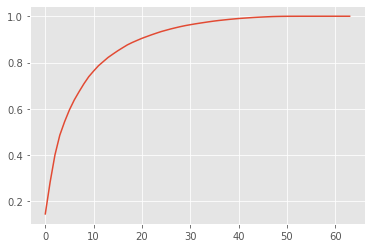

In [24]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

In [25]:
pca = PCA(0.95)             # pca提供接口，传入需要表示原数据的百分比(n_components)，自动求解维数(n_components_)     
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.n_components_

28

In [27]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [28]:
%%time 
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 4.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
knn_clf.score(X_test_reduction, y_test)

0.98

### 使用PCA对数据进行降维可视化（n_components=2)

In [30]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

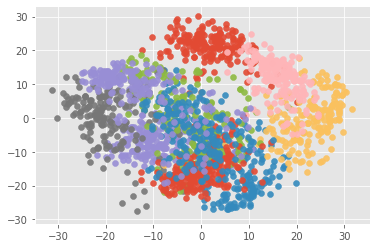

In [31]:
for i in range(10):           # 不同颜色代表不同类别（10个数字），在这个降维的二维空间的分布。
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.9)